## Imports

In [1]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

import time
import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types


## Pure python function

In [30]:
def solve_2d_burger_pure(u, v, nt, dt, dx, dy, nu):
    
    
    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    
    #fill the update of u and v
    
    for n in range(nt ): ##loop across number of time steps
  
        for j in range(2, row):
            for i in range(2, col):
            
                u[j-1, i-1] = (u[i-1, j-1] -
                                 dt / dx * u[j-1, i-1] * 
                                 (u[j-1, i-1] - u[j-1, i-2]) - 
                                 dt / dy * v[j-1, i-1] * 
                                 (u[j-1, i-1] - u[j-2, i-1]) + 
                                 nu * dt / dx**2 * 
                                 (u[j-1, i] - 2 * u[j-1, i-1] + u[j-1, i-2]) + 
                                 nu * dt / dy**2 * 
                                 (u[j, i-1] - 2 * u[j-1, i-1] + u[j-2, i-1]))
                
                v[j-1, i-1] = (v[j-1, i-1] - 
                                 dt / dx * u[j-1, i-1] *
                                 (v[j-1, i-1] - v[j-1, i-2]) -
                                 dt / dy * v[j-1, i-1] * 
                                (v[j-1, i-1] - v[j-2, i-1]) + 
                                 nu * dt / dx**2 * 
                                 (v[j-1, i] - 2 * v[j-1, i-1] + v[j-1, i-2]) +
                                 nu * dt / dy**2 *
                                 (v[j, i-1] - 2 * v[j-1, i-1] + v[j-2, i-1]))
        
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1
        
        v[0, :] = 1
        v[-1, :] = 1
        v[:, 0] = 1
        v[:, -1] = 1
        
    return 0

## Numba accelerator

In [33]:
@njit(fastmath=True)
def solve_2d_burger_numba(u, v, nt, dt, dx, dy, nu):
    
    
    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    
    #fill the update of u and v
        
  
        for j in range(2, row):
            for i in range(2, col):
            
                u[j-1, i-1] = (u[i-1, j-1] - dt / dx * u[j-1, i-1] *  (u[j-1, i-1] - u[j-1, i-2]) -                                 
                                dt / dy * v[j-1, i-1] * (u[j-1, i-1] - u[j-2, i-1]) + nu * dt / dx**2 *                            
                               (u[j-1, i] - 2 * u[j-1, i-1] + u[j-1, i-2]) +  nu * dt / dy**2 *                                 
                                 (u[j, i-1] - 2 * u[j-1, i-1] + u[j-2, i-1]))
                
                v[j-1, i-1] = (v[j-1, i-1] -  dt / dx * u[j-1, i-1] *(v[j-1, i-1] - v[j-1, i-2]) - dt / dy * v[j-1, i-1] *                            
                                                                
                                (v[j-1, i-1] - v[j-2, i-1]) +  nu * dt / dx**2 *  (v[j-1, i] - 2 * v[j-1, i-1] + v[j-1, i-2]) +
                                                               
                                 nu * dt / dy**2 *(v[j, i-1] - 2 * v[j-1, i-1] + v[j-2, i-1]))
                                 
        
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1
        
        v[0, :] = 1
        v[-1, :] = 1
        v[:, 0] = 1
        v[:, -1] = 1
        
        
        
        
    return 0

IndentationError: unexpected indent (<ipython-input-33-d0d2edf3926a>, line 15)

## Pyccel accelerator

In [32]:
@types('float[:,:]', 'float[:,:]', 'int', 'float', 'float', 'float', 'float')
def solve_2d_burger_pyccel(u, v, nt, dt, dx, dy, nu):
    
    
    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    
    #fill the update of u and v
    for n in range(nt ): 
  
        for j in range(2, row):
            for i in range(2, col):
            
                u[j-1, i-1] = (u[i-1, j-1] - dt / dx * u[j-1, i-1] *  (u[j-1, i-1] - u[j-1, i-2]) -                                 
                                dt / dy * v[j-1, i-1] * (u[j-1, i-1] - u[j-2, i-1]) + nu * dt / dx**2 *                            
                               (u[j-1, i] - 2 * u[j-1, i-1] + u[j-1, i-2]) +  nu * dt / dy**2 *                                 
                                 (u[j, i-1] - 2 * u[j-1, i-1] + u[j-2, i-1]))
                
                v[j-1, i-1] = (v[j-1, i-1] -  dt / dx * u[j-1, i-1] *(v[j-1, i-1] - v[j-1, i-2]) - dt / dy * v[j-1, i-1] *                            
                                                                
                                (v[j-1, i-1] - v[j-2, i-1]) +  nu * dt / dx**2 *  (v[j-1, i] - 2 * v[j-1, i-1] + v[j-1, i-2]) +
                                                               
                                 nu * dt / dy**2 *(v[j, i-1] - 2 * v[j-1, i-1] + v[j-2, i-1]))
                                 
        
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1
        
        v[0, :] = 1
        v[-1, :] = 1
        v[:, 0] = 1
        v[:, -1] = 1
        
        
    return 0

## Inputs

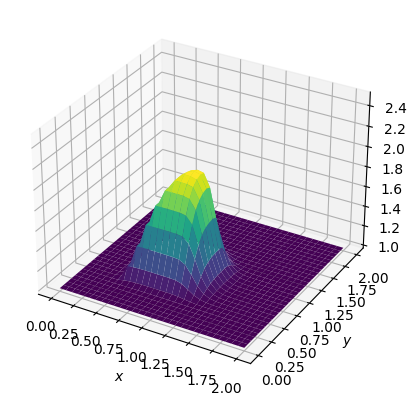

In [13]:
###variable declarations
nx = 31
ny = 31
nt = 120
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .0009
nu = 0.01
dt = sigma * dx * dy / nu


x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))  # create a 1xn vector of 1's
v = np.ones((ny, nx))


solve_2d_burger_pure(u, v, nt, dt, dx, dy, nu)

X, Y = np.meshgrid(x, y)
fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=True)
ax.set_zlim(1, 2.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

## Call Funtions

### Pure function

In [15]:
%timeit solve_2d_burger_pure(u, v, nt, dt, dx, dy, nu)

895 ms ± 13 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with numba accelerator

In [20]:
%timeit solve_2d_burger_numba(u, v, nt, dt, dx, dy, nu)

904 µs ± 17.6 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with pyccel accelerator

In [25]:
solve_2d_burger_f90 = epyccel(solve_2d_burger_pyccel)

In [26]:
%timeit solve_2d_burger_f90(u, v, nt, dt, dx, dy, nu)

926 µs ± 6.21 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
